In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
countries = pd.read_csv('countries_clean5.csv')
countries = countries.replace(r'^\s*$', np.nan, regex=True)
countries.HDI_for_year.interpolate()
countries

,country,year,sex,age,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Argentina,1990,male,75+ years,226,411100,54.97,0.707,1.413520e+11,4859,G.I. Generation
1,Argentina,1990,male,55-74 years,502,2128000,23.59,0.707,1.413520e+11,4859,G.I. Generation
2,Argentina,1990,male,35-54 years,439,3619000,12.13,0.707,1.413520e+11,4859,Silent
3,Argentina,1990,female,75+ years,61,643000,9.49,0.707,1.413520e+11,4859,G.I. Generation
4,Argentina,1990,male,25-34 years,182,2297000,7.92,0.707,1.413520e+11,4859,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
11515,United States,2013,female,25-34 years,1285,20951958,6.13,0.914,1.669150e+13,56520,Millenials
11516,United States,2013,female,15-24 years,975,21698877,4.49,0.914,1.669150e+13,56520,Millenials
11517,United States,2013,female,75+ years,431,11486590,3.75,0.914,1.669150e+13,56520,Silent
11518,United States,2013,male,5-14 years,252,21233001,1.19,0.914,1.669150e+13,56520,Generation Z


In [2]:
countries.describe()

,year,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
count,11520.000000,11520.000000,1.152000e+04,11520.000000,11520.000000,1.152000e+04,11520.000000
mean,2001.500000,401.623872,2.887589e+06,13.569021,0.792486,8.253307e+11,22751.143750
std,6.922487,1266.188750,5.072188e+06,17.348695,0.093446,1.971880e+12,20447.124069
min,1990.000000,0.000000,4.700000e+03,0.000000,0.477000,1.249062e+09,291.000000
25%,1995.750000,11.000000,3.117188e+05,2.270000,0.726000,3.910153e+10,5605.750000
50%,2001.500000,60.000000,8.104805e+05,8.045000,0.813000,1.894735e+11,20197.000000
75%,2007.250000,238.000000,3.287346e+06,18.182500,0.869000,6.093470e+11,33518.750000
max,2013.000000,22338.000000,4.380521e+07,185.370000,0.946000,1.669150e+13,122729.000000


In [3]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            11520 non-null  object 
 1   year               11520 non-null  int64  
 2   sex                11520 non-null  object 
 3   age                11520 non-null  object 
 4   suicide_no         11520 non-null  int64  
 5   population         11520 non-null  int64  
 6   suicides_per_100k  11520 non-null  float64
 7   HDI_for_year       11520 non-null  float64
 8   gdp_for_year       11520 non-null  float64
 9   gdp_per_capita     11520 non-null  int64  
 10  generation         11520 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 990.1+ KB


In [4]:
#Summarised table for co-relation between variables
countries.corr()

,year,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
year,1.000000,0.008309,0.032352,-0.065067,0.369599,0.127164,0.362304
suicide_no,0.008309,1.000000,0.602173,0.397727,0.065998,0.396271,0.020006
population,0.032352,0.602173,1.000000,0.011145,0.068335,0.716802,0.029717
suicides_per_100k,-0.065067,0.397727,0.011145,1.000000,0.066119,0.023331,0.016249
HDI_for_year,0.369599,0.065998,0.068335,0.066119,1.000000,0.304582,0.782836
gdp_for_year,0.127164,0.396271,0.716802,0.023331,0.304582,1.000000,0.278626
gdp_per_capita,0.362304,0.020006,0.029717,0.016249,0.782836,0.278626,1.000000


In [5]:
#Summarised table for co-varience between variables
countries.cov()

,year,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
year,4.792083e+01,7.282642e+01,1.135941e+06,-7.814315e+00,2.390869e-01,1.735834e+12,5.128225e+04
suicide_no,7.282642e+01,1.603234e+06,3.867364e+09,8.736761e+03,7.808979e+00,9.893986e+14,5.179479e+05
population,1.135941e+06,3.867364e+09,2.572709e+13,9.807353e+05,3.238939e+04,7.169266e+18,3.081991e+09
suicides_per_100k,-7.814315e+00,8.736761e+03,9.807353e+05,3.009772e+02,1.071896e-01,7.981330e+11,5.764075e+03
HDI_for_year,2.390869e-01,7.808979e+00,3.238939e+04,1.071896e-01,8.732231e-03,5.612381e+10,1.495773e+03
gdp_for_year,1.735834e+12,9.893986e+14,7.169266e+18,7.981330e+11,5.612381e+10,3.888309e+24,1.123400e+16
gdp_per_capita,5.128225e+04,5.179479e+05,3.081991e+09,5.764075e+03,1.495773e+03,1.123400e+16,4.180849e+08


In [6]:
st.pearsonr(countries['population'],countries['gdp_for_year'])

(0.7168016432736115, 0.0)

In [7]:
#Highest positie co-relation
st.pearsonr(countries['gdp_per_capita'],countries['HDI_for_year'])

(0.7828359777303957, 0.0)

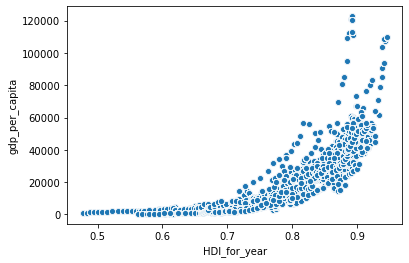

In [8]:
sns.scatterplot(countries['HDI_for_year'],countries['gdp_per_capita'])

In [9]:
st.pearsonr(countries['year'],countries['suicides_per_100k'])

(-0.0650671784089658, 2.7411788798101926e-12)

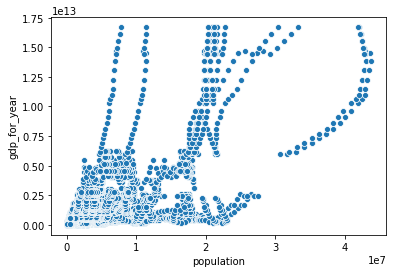

In [10]:
sns.scatterplot(countries['population'],countries['gdp_for_year'])

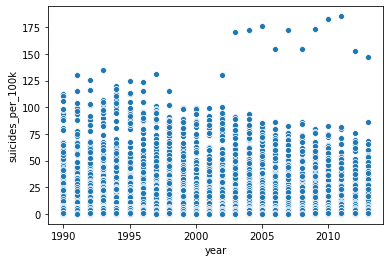

In [11]:
sns.scatterplot(countries['year'],countries['suicides_per_100k'])

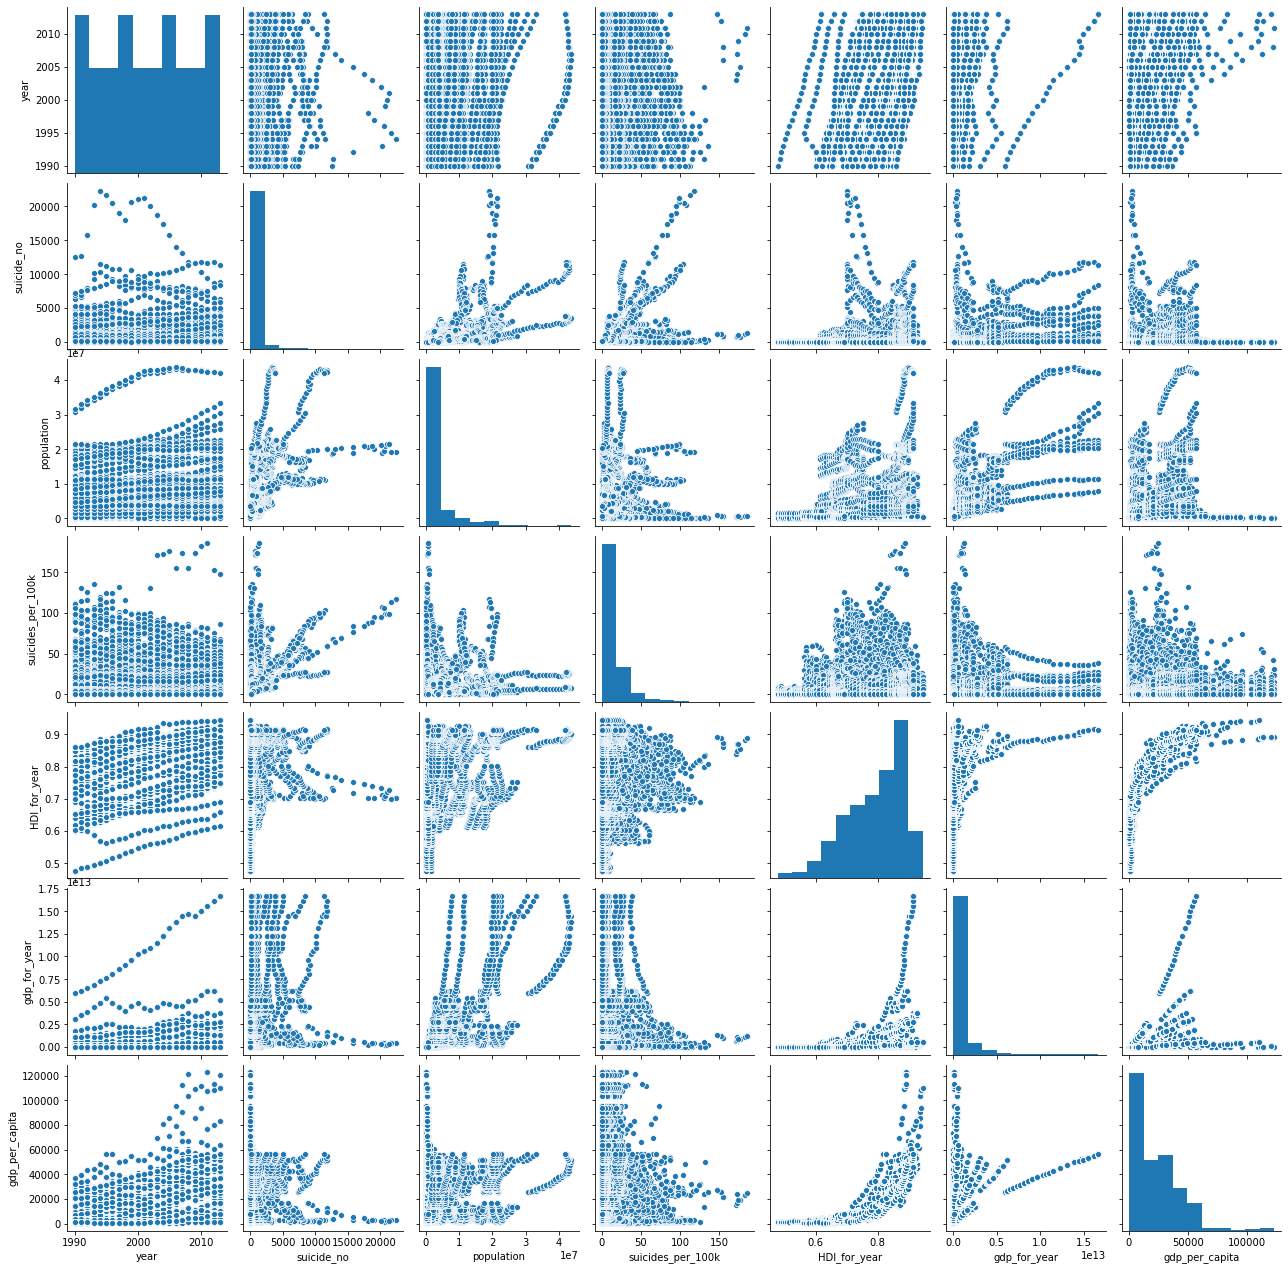

In [12]:
sns.pairplot(countries)

In [13]:
st.spearmanr(countries['year'],countries['suicides_per_100k'])

SpearmanrResult(correlation=-0.04205221455629837, pvalue=6.330940167264927e-06)

In [14]:
st.spearmanr(countries['gdp_per_capita'],countries['HDI_for_year'])

SpearmanrResult(correlation=0.9298571597324988, pvalue=0.0)

In [15]:
st.spearmanr(countries['population'],countries['gdp_for_year'])

SpearmanrResult(correlation=0.7538902567629807, pvalue=0.0)

In [16]:
st.spearmanr(countries['population'],countries['suicide_no'])

SpearmanrResult(correlation=0.7308950639575024, pvalue=0.0)

In [17]:
from scipy.stats import ttest_rel
_, pvalue = ttest_rel(countries.population,countries.gdp_for_year)
pvalue

0.0

In [18]:
_, pvalue = ttest_rel(countries.population,countries.suicides_per_100k)
pvalue

0.0

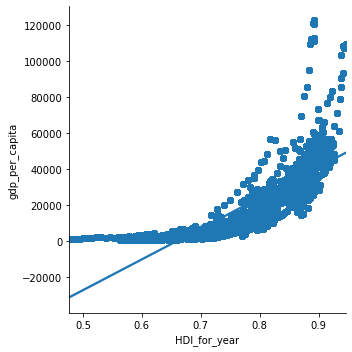

In [19]:
sns.lmplot(x='HDI_for_year', y='gdp_per_capita', data = countries)
plt.show()

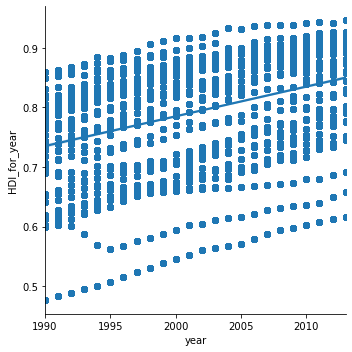

In [20]:
sns.lmplot(x='year', y='HDI_for_year', data = countries)
plt.show()

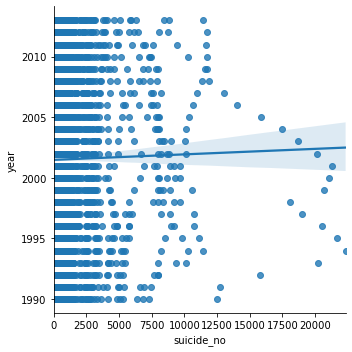

In [21]:
sns.lmplot(x='suicide_no', y='year', data = countries)
plt.show()

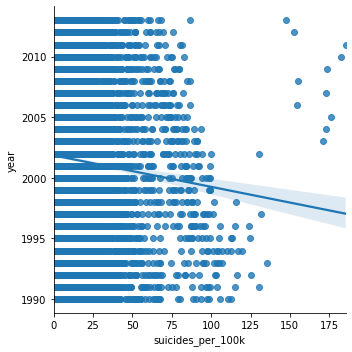

In [22]:
sns.lmplot(x='suicides_per_100k', y='year', data = countries)
plt.show()

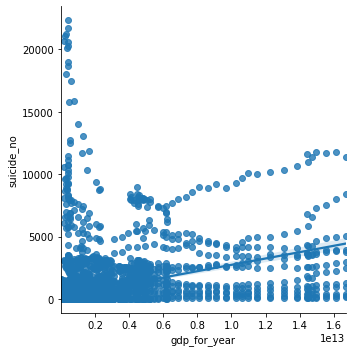

In [23]:
sns.lmplot(x='gdp_for_year', y='suicide_no', data = countries)
plt.show()

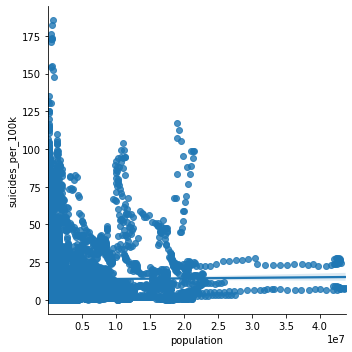

In [24]:
sns.lmplot(x='population', y='suicides_per_100k', data = countries)
plt.show()

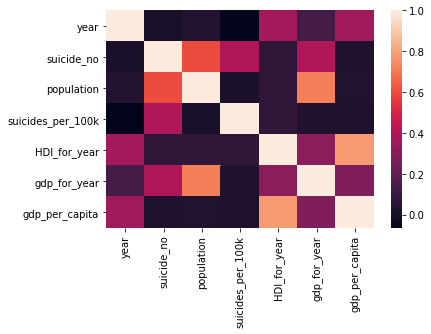

In [28]:
val=countries.corr()
sns.heatmap(val)